# <u>Spotify Hit Predictor Model for 10's Dataset</u>

### Importing Libraries

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl #add'l plotting functionality

### Loading Dataset

In [29]:
df=pd.read_csv("dataset-of-10s.csv")
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
track               6398 non-null object
artist              6398 non-null object
uri                 6398 non-null object
danceability        6398 non-null float64
energy              6398 non-null float64
key                 6398 non-null int64
loudness            6398 non-null float64
mode                6398 non-null int64
speechiness         6398 non-null float64
acousticness        6398 non-null float64
instrumentalness    6398 non-null float64
liveness            6398 non-null float64
valence             6398 non-null float64
tempo               6398 non-null float64
duration_ms         6398 non-null int64
time_signature      6398 non-null int64
chorus_hit          6398 non-null float64
sections            6398 non-null int64
target              6398 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 949.8+ KB


In [31]:
df.shape

(6398, 19)

### Shuffling of Data

In [32]:
df=df.sample(frac=1)
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
2993,Mayores,Becky G Featuring Bad Bunny,spotify:track:2AY1UAimvTqjJC8vDJsOyy,0.745,0.836,5,-4.336,0,0.0444,0.1450,0.00314,0.1160,0.874,96.993,203187,4,29.49773,10,1
3559,What If I Never Get Over You,Lady Antebellum,spotify:track:0qkdE1C0ufnUISKwhg8Wh6,0.576,0.724,0,-5.147,1,0.0274,0.0160,0.00000,0.1070,0.340,93.029,206598,4,53.32305,8,1
854,Ice Tray,Quavo & Lil Yachty,spotify:track:3wdfLVUhmX64lIyWIIEW8s,0.890,0.504,8,-5.444,0,0.1230,0.0230,0.00000,0.1230,0.222,129.969,213613,4,45.71645,9,1
6256,Sleep Without You,Brett Young,spotify:track:7Ad0OLsUn63FoD4gnguZz5,0.626,0.707,5,-5.755,0,0.0425,0.0169,0.00000,0.0769,0.653,88.543,188467,4,20.02105,9,1
2141,Dance Or Die - Original Mix,Cabaret Nocturne,spotify:track:3LSVxvKUyjEta3wdHQC2Dy,0.786,0.758,2,-8.594,0,0.0845,0.0058,0.92100,0.0894,0.189,115.991,379500,4,115.41599,11,0


### Balancing of Data

In [33]:
#Dropping Categorical features
X=df.drop(['target',"track","artist","uri"],axis=1)
X.shape    #modified dataframe for X

(6398, 15)

In [34]:
Y=df["target"]
hit_flop_count=Y.value_counts()
hit_flop_count

1    3199
0    3199
Name: target, dtype: int64

In [35]:
Y=Y.values

### Standardizing the Inputs

In [36]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

### Split the dataset into Train, Test, Validation set

In [37]:
#train-test split in 90%-10%
x_train, x_test, y_train, y_test = train_test_split(scaled_X, Y, 
                                test_size=0.1, random_state=1)

In [38]:
#Train-Validation split 90%-10%
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, 
                                test_size=(1/9), random_state=1)
#1/9 of 90% is 10% as we are using train if we use Scaled X then we use test size as 0.1

In [39]:
x_train.shape,x_test.shape,x_val.shape

((5118, 15), (640, 15), (640, 15))

### Creating Deep Learning Algorithm

In [40]:
nn = 200 #number of neurons in hidden layers
target_count = 2              #ouput i.e. 1 and 0

In [41]:
model_10 = keras.Sequential([

keras.layers.Flatten(), #to flaten our data for better results 
keras.layers.Dense(nn, activation=tf.nn.relu),# first hidden  layer
keras.layers.Dense(nn, activation=tf.nn.relu),# second hidden layer
keras.layers.Dense(nn, activation=tf.nn.relu),# third hidden layer

keras.layers.Dense(target_count, activation=tf.nn.softmax)# output layer
    
    ])

In [42]:
model_10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])

In [43]:
#fitting the model 
model_fit = model_10.fit(x_train, y_train, epochs=20,
                         validation_data=(x_val, y_val), batch_size=100)

Epoch 1/20
52/52 [==============================] - 0s 4ms/step - loss: 0.4752 - accuracy: 0.7663 - val_loss: 0.3733 - val_accuracy: 0.8281
Epoch 2/20
52/52 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8191 - val_loss: 0.3644 - val_accuracy: 0.8188
Epoch 3/20
52/52 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8306 - val_loss: 0.3790 - val_accuracy: 0.8172
Epoch 4/20
52/52 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8314 - val_loss: 0.3613 - val_accuracy: 0.8250
Epoch 5/20
52/52 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8413 - val_loss: 0.3869 - val_accuracy: 0.8219
Epoch 6/20
52/52 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8466 - val_loss: 0.3611 - val_accuracy: 0.8281
Epoch 7/20
52/52 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8542 - val_loss: 0.3704 - val_accuracy: 0.8219
Epoch 8/20
52/52 [==

In [44]:
#Storing the predictions
predictions = model_10.predict(x_test)

### Visualize Neural Network Loss History

#### Loss Variation Plot

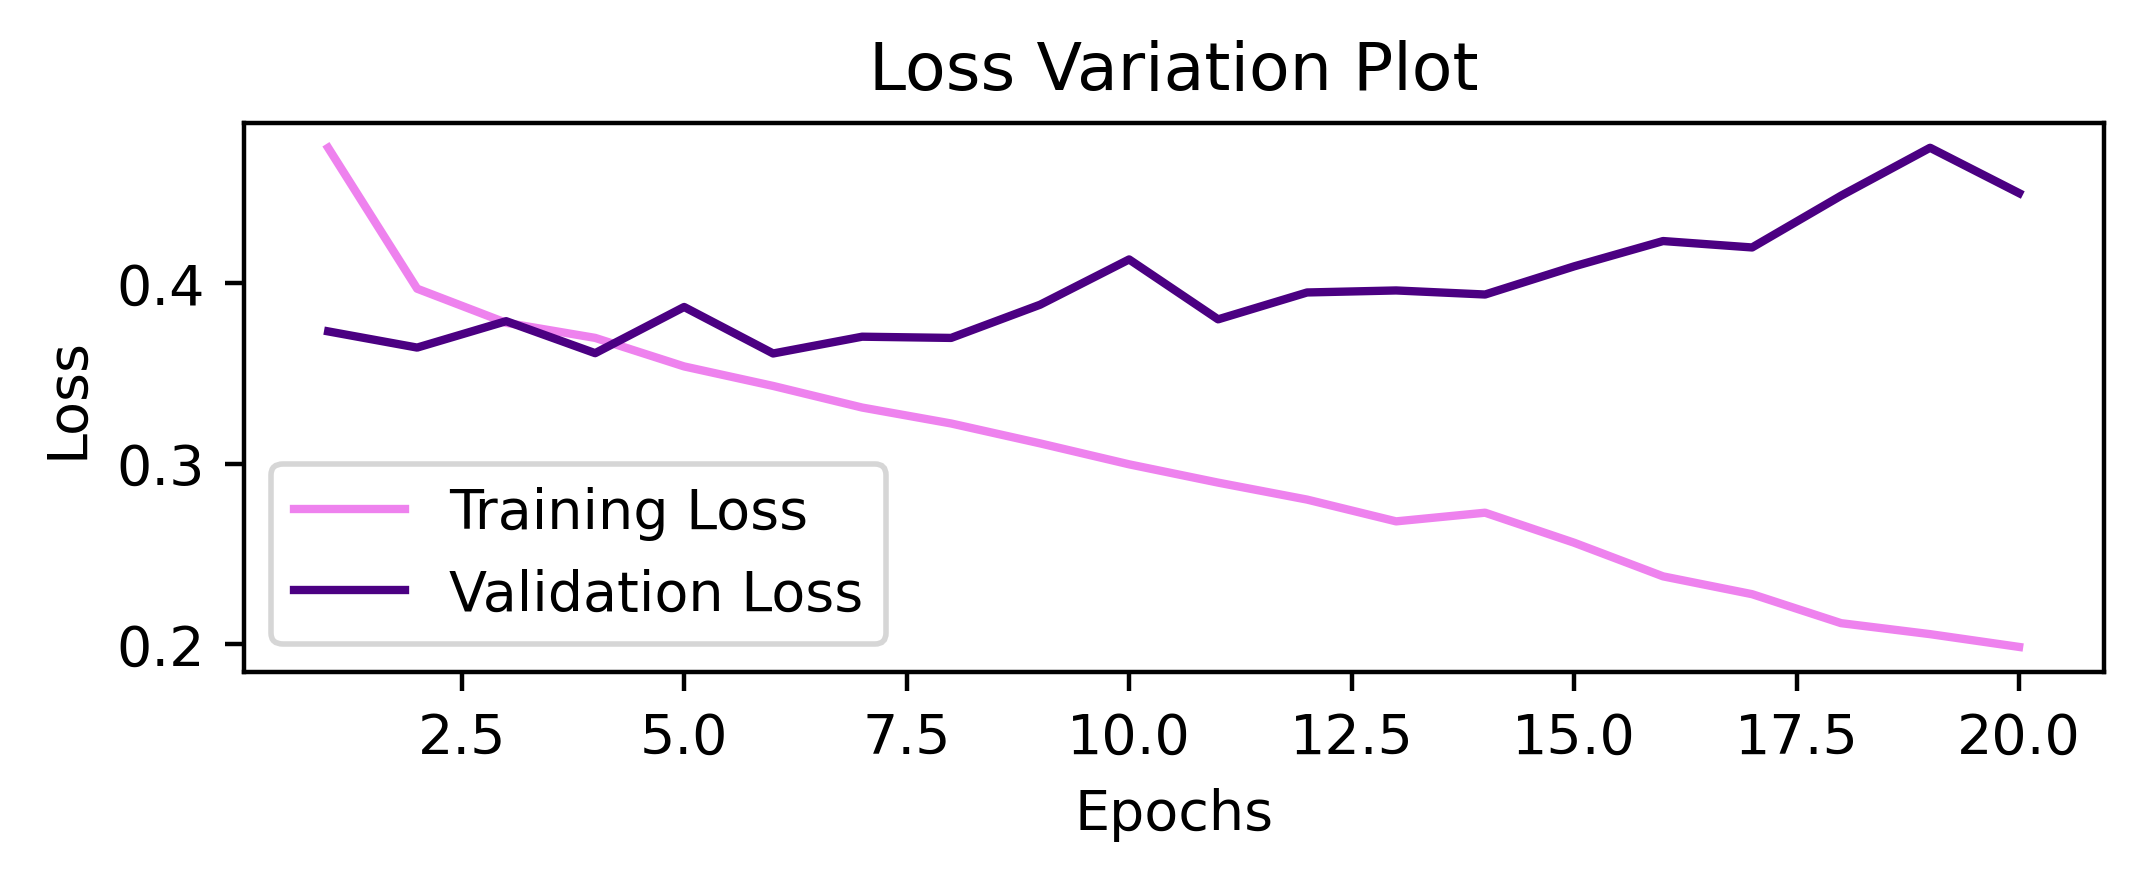

In [45]:
training_loss = model_fit.history['loss']
validation_loss = model_fit.history['val_loss']
epoch_count1 = range(1, len(training_loss) + 1)

#-------------plotting--------------------------

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.subplot(2,1,2)
plt.title('Loss Variation Plot')
plt.plot(epoch_count1, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count1, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


#### Accuracy Variation Plot

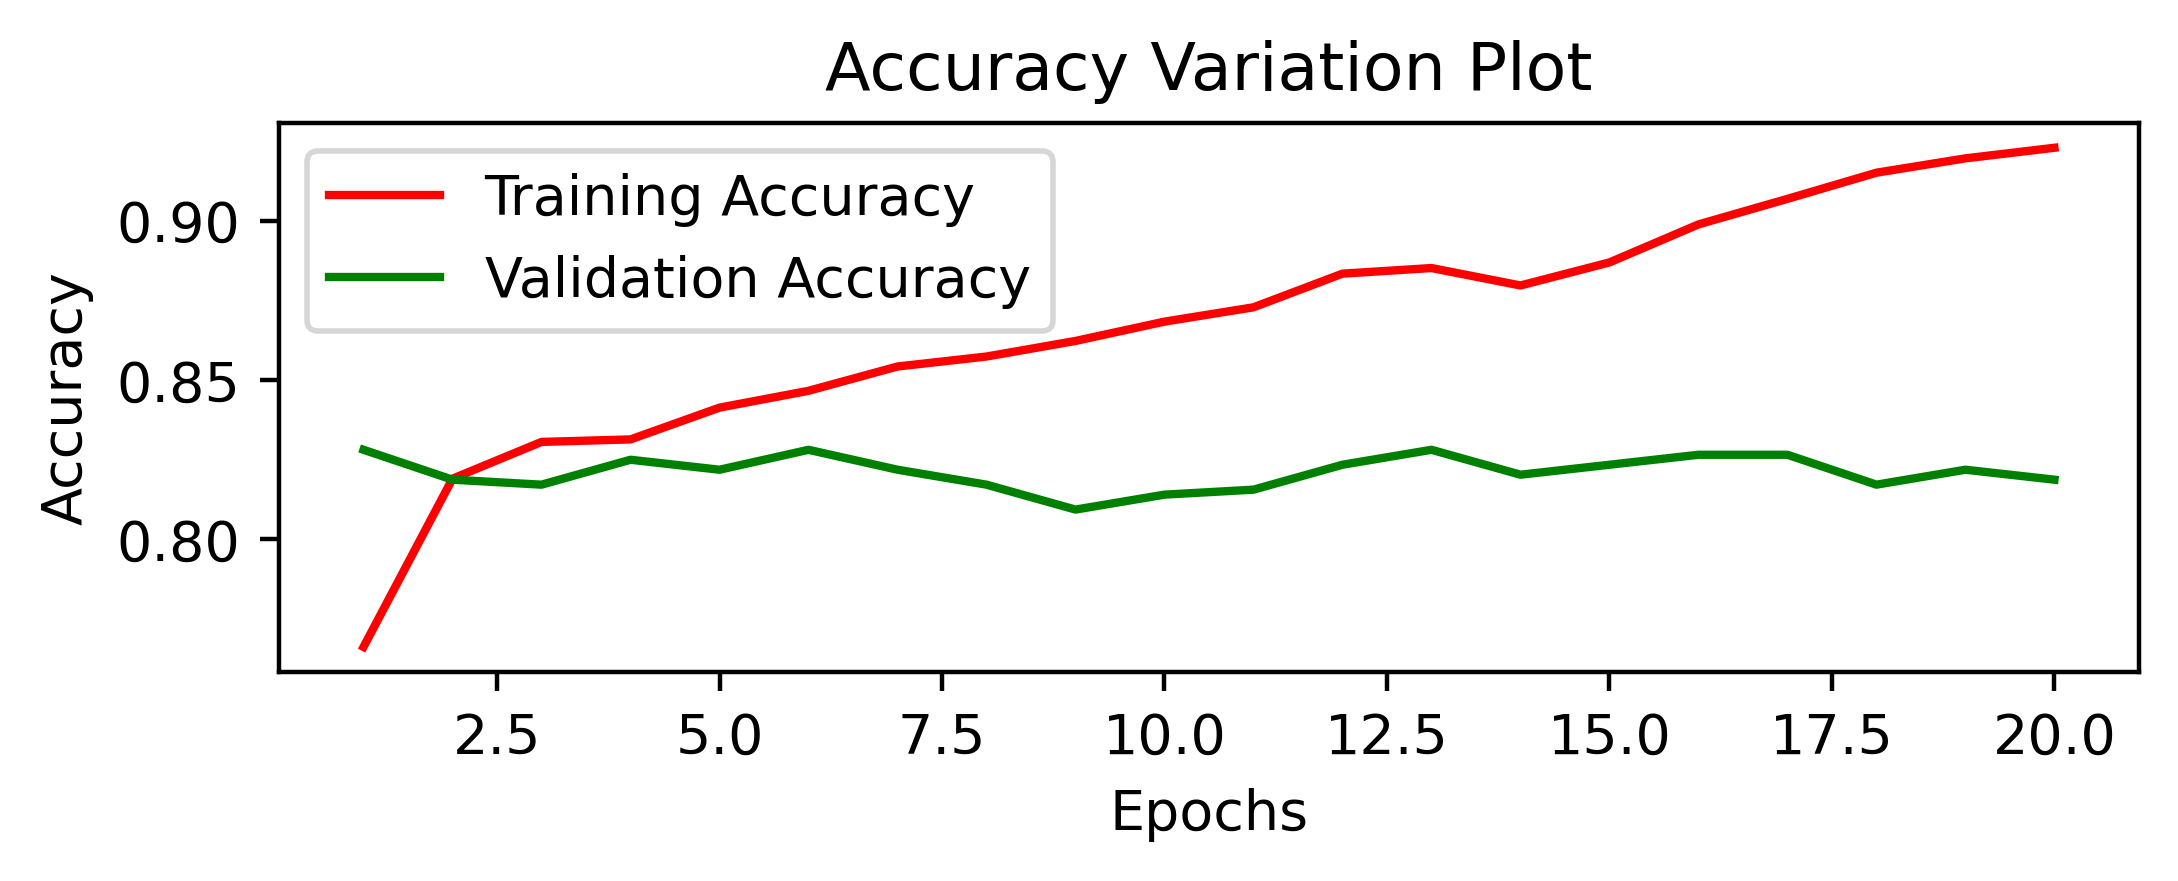

In [46]:
training_acc = model_fit.history['accuracy']
validation_acc = model_fit.history['val_accuracy']
epoch_count2 = range(1, len(training_acc) + 1)

#plotting 
plt.subplot(2,1,2)
plt.title('Accuracy Variation Plot')
plt.plot(epoch_count2, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count2, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Testing Model

In [47]:
print(predictions[215])
print('Predicted:', np.argmax(predictions[215]))
print('Original:', y_test[215])

[9.999914e-01 8.577136e-06]
Predicted: 0
Original: 0


### Saving model and Verifying

In [48]:
model_10.save('Trained_model_10')    #saved as protobuf (.pb)

INFO:tensorflow:Assets written to: Trained_model_10\assets


In [49]:
model_10.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               3200      
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 402       
Total params: 84,002
Trainable params: 84,002
Non-trainable params: 0
_________________________________________________________________


In [50]:
model = tf.keras.models.load_model('Trained_model_10')
print(x_test[1])

[-0.79629872  1.00224712 -0.35594825  0.66692285  0.74104827 -0.54741943
 -0.68740001  2.17974027 -0.33526633 -0.28782245  0.25157027 -0.25252992
  0.18303334  2.16616326 -0.61352742]


In [51]:
print(x_test[1].reshape( 1,-1))

[[-0.79629872  1.00224712 -0.35594825  0.66692285  0.74104827 -0.54741943
  -0.68740001  2.17974027 -0.33526633 -0.28782245  0.25157027 -0.25252992
   0.18303334  2.16616326 -0.61352742]]


In [52]:
v = model.predict(x_test[1].reshape( 1,-1))
print(v)

[[9.9999869e-01 1.3689036e-06]]
